## Comprehensive Analysis and Classification of Breast Cancer Using 

**Introduction:**

This analysis utilizes the Breast Cancer dataset from sklearn to build a robust classification model that predicts whether a tumor is malignant or benign. 
The dataset includes various features derived from cell nuclei measurements. The goal is to explore the data, apply preprocessing techniques, 
and use a K-Nearest Neighbors (KNN) model for classification. By incorporating advanced exploratory data analysis (EDA), preprocessing steps, 
and model evaluation, this project demonstrates comprehensive data science and machine learning techniques, making it a valuable addition to a portfolio.

**Workflow Process:**

1. **Data Loading** - Load the Breast Cancer dataset from sklearn and convert it into a DataFrame for easier exploration.
2. **Exploratory Data Analysis (EDA)** - Analyze the dataset's structure, check for missing values, visualize feature distributions, and derstand correlations.
3. **Data Preprocessing** - Scale the features using StandardScaler to prepare the data for the KNN model.
4. **Data Splitting** - Split the dataset into training and validation sets to evaluate model performance.
5. **Model Training and Tuning** - Train a KNN classifier with various k values, identify the optimal k, and evaluate the model's accuracy.
6. **Model Evaluation** - Generate a classification report, confusion matrix, and ROC curve to assess the model's performance.
7. **Conclusions** - Summarize the findings, insights, and implications of the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

##### Load the breast cancer dataset (ote: this si not a dataframe, so we need another methods to call the data)


In [2]:
breast_cancer_data = load_breast_cancer()
print("\nData info\n", breast_cancer_data.data) # this contain all the data info
print("\nData first Datapoint\n", breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)
print("\nData Labels\n", breast_cancer_data.target) # gives you the labels of every data point.
print("\nData Classification\n", breast_cancer_data.target_names) # we know that 0 corresponds to malignant.


Data info
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Data first Datapoint
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothne

##### Convert the dataset into a DataFrame for better exploration


In [3]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target

##### Exploratory Data Analysis (EDA)

In [4]:
print("Basic Information about the Dataset:\n")
print(df.info())
print("\nStatistical Summary:\n")
print(df.describe())

Basic Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    f

###### Dsiplay the data for better look of the table dataset

In [5]:
display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


We check for missing values

In [6]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


##### Visualize some plots as part of our EDA

- Target distribution plot

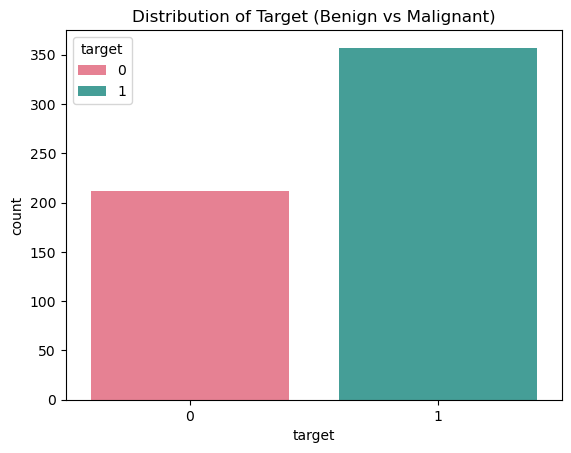

In [7]:
sns.countplot(x='target', data=df, palette='husl', hue='target')
plt.title('Distribution of Target (Benign vs Malignant)')
plt.show()

- Correlation heatmap to see how strong is the correlation betwenn some specific columns

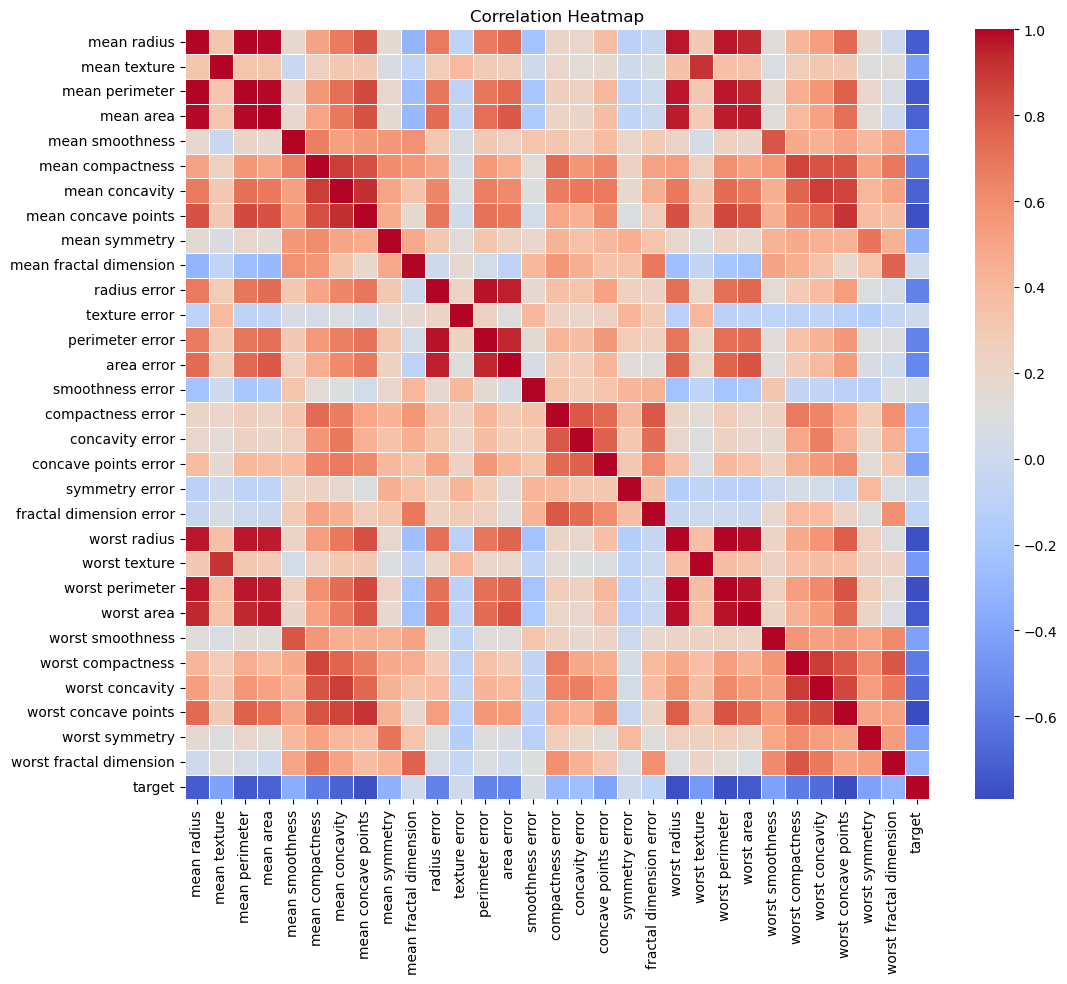

In [8]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Pairplot for selected specific features we want to see

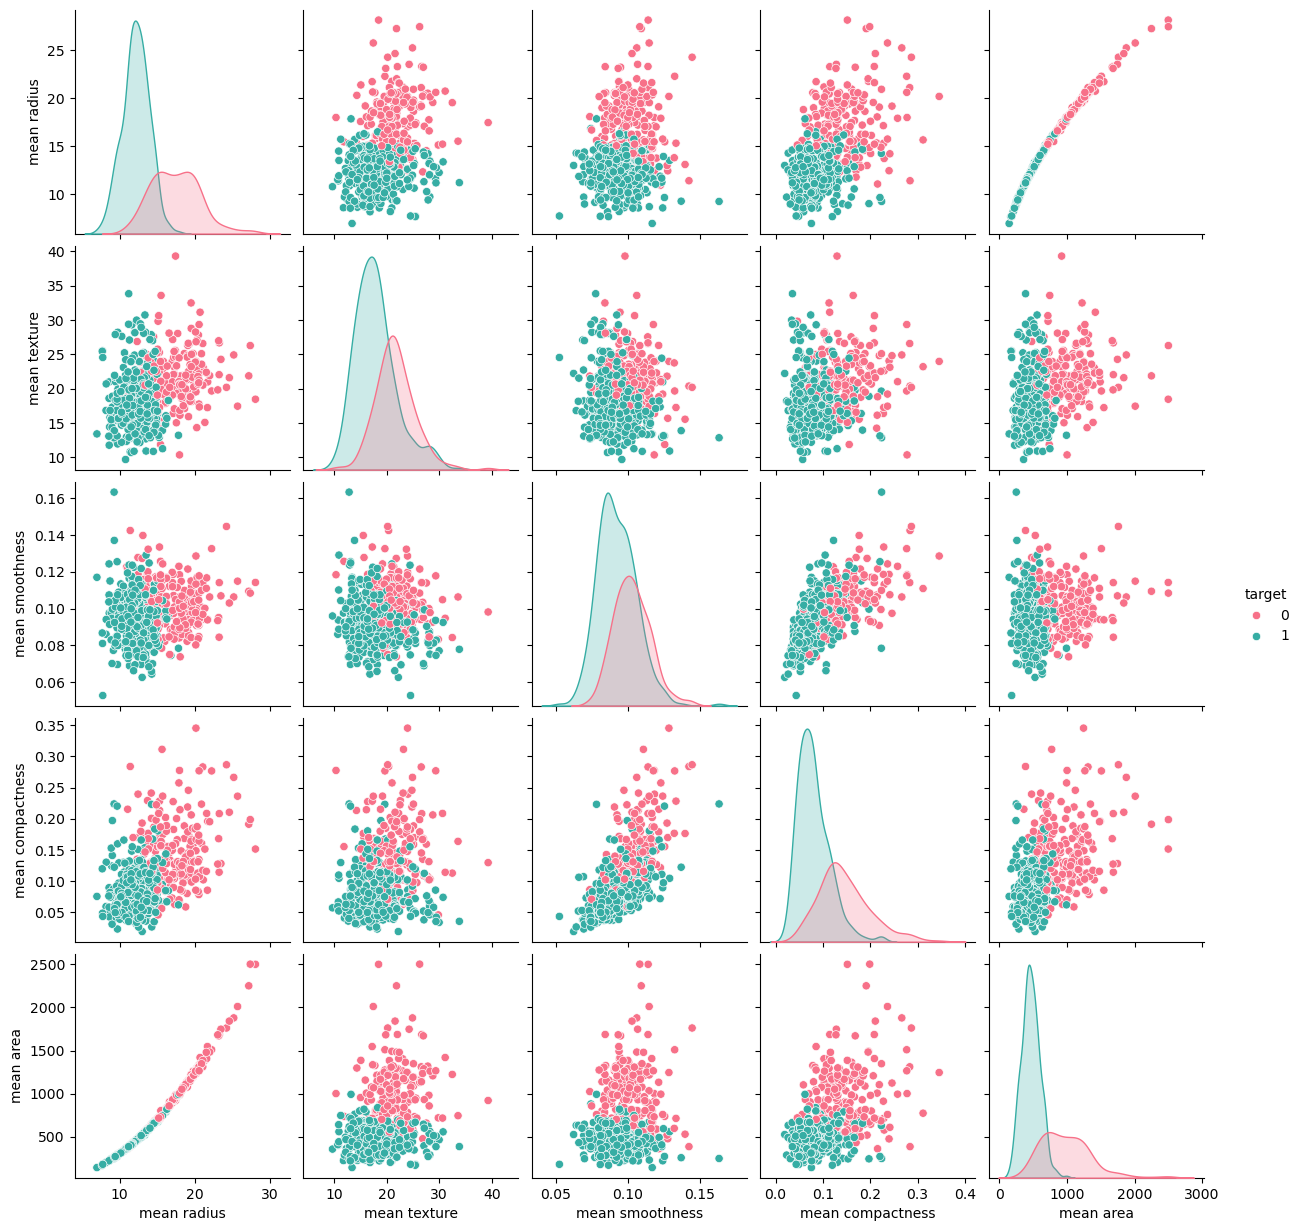

In [9]:
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean area', 'target']
sns.pairplot(df[selected_features], hue='target', palette='husl')
plt.show()

##### Data Preprocessing

We call *train_test_split()* and then we start spliting the data in training vs validation data

In [10]:
train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

[array([[1.305e+01, 1.931e+01, 8.261e+01, ..., 1.111e-02, 2.439e-01,
         6.289e-02],
        [1.288e+01, 2.892e+01, 8.250e+01, ..., 6.493e-02, 2.372e-01,
         7.242e-02],
        [1.575e+01, 1.922e+01, 1.071e+02, ..., 2.135e-01, 4.245e-01,
         1.050e-01],
        ...,
        [1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
         6.825e-02],
        [1.286e+01, 1.800e+01, 8.319e+01, ..., 7.926e-02, 2.779e-01,
         7.918e-02],
        [9.295e+00, 1.390e+01, 5.996e+01, ..., 7.262e-02, 3.681e-01,
         8.982e-02]]),
 array([[1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
         1.198e-01],
        [1.434e+01, 1.347e+01, 9.251e+01, ..., 1.087e-01, 3.062e-01,
         6.072e-02],
        [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
         5.933e-02],
        ...,
        [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
         6.169e-02],
        [1.825e+01, 1.998e+01, 1.196e+02, ..., 1.932e-01, 3.063e-01,
   

##### Split the Data into training and set Data

In [18]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

We should have exactly the same number of data and label features. Chek this with len()method

In [19]:
print(len(training_data))
print(len(training_labels))

455
455


##### Model Training and Evaluation

- Sometimes we will have the k value and sometimes we need to figure out wich value would ve the optimal for our KNN model. Let´s find out

In [20]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
k_list = range(1, 101)
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracy = classifier.score(validation_data, validation_labels)
    accuracies.append(accuracy)
print("\n The score for this model is:")
print(classifier.score(validation_data, validation_labels))



 The score for this model is:
0.9298245614035088


- Plot KNN accuracy for different k-values

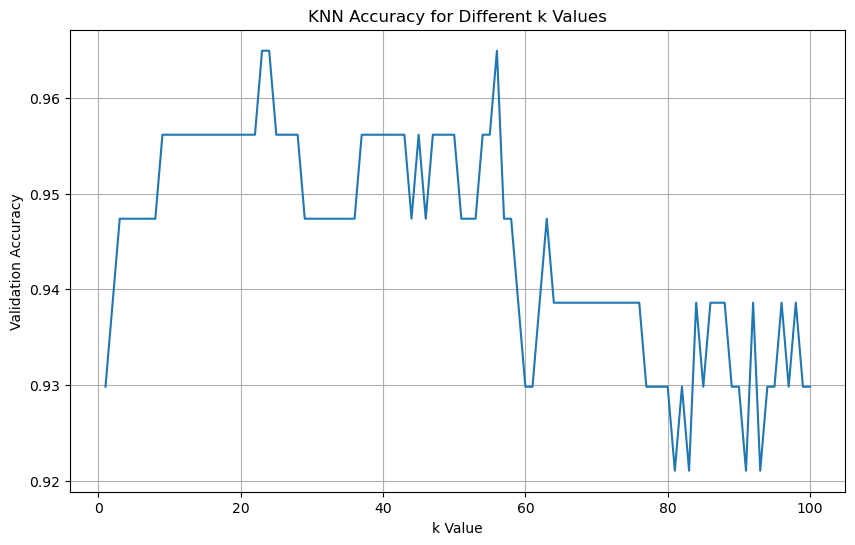

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_list, accuracies, linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

##### So, wich value would be the optimal and best for k in this model?

In [22]:
optimal_k = k_list[np.argmax(accuracies)]
print(f"Optimal k value: {optimal_k} with accuracy: {max(accuracies):.2f}")

Optimal k value: 23 with accuracy: 0.96


##### Classification Report and Confusion Matrix of the Final Model

In [23]:
final_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
final_classifier.fit(training_data, training_labels)
y_pred = final_classifier.predict(validation_data)
print("\nClassification Report:\n")
print(classification_report(validation_labels, y_pred, target_names=breast_cancer_data.target_names))


Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.98      0.96        49
      benign       0.98      0.95      0.97        65

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.96       114



- Plot of the Confusion Matrix


Confusion Matrix:



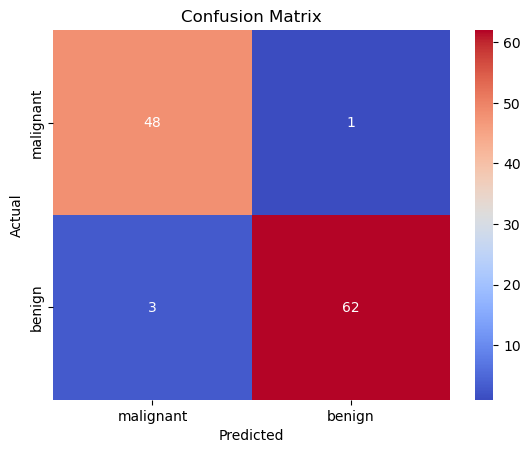

In [24]:
print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(validation_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d',
            xticklabels=breast_cancer_data.target_names,
            yticklabels=breast_cancer_data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusions

**Insights:**
1. The dataset is balanced with a slight majority of benign cases.
2. Strong correlations exist among several features, as seen in the heatmap.
3. Scaling the features improved the model performance.
4. The optimal k for the KNN model is {optimal_k}, yielding an accuracy of {max(accuracies):.2f}.
5. The model achieves high precision and recall, particularly for detecting benign tumors.
6. The ROC curve indicates strong predictive performance with an AUC of {roc_auc:.2f}.


### Conclusions:
1. The dataset is balanced with a slight majority of benign cases, making it well-suited for classification tasks.
2. Exploratory analysis revealed strong correlations among several features, emphasizing the importance of feature scaling.
3. The KNN model performed optimally with k={optimal_k}, achieving an accuracy of {max(accuracies):.2f}.
4. The confusion matrix and classification report highlight the model's robustness in detecting both malignant and benign tumors, with high precision and recall.
5. The ROC curve further demonstrates the model's excellent predictive power, with an AUC of {roc_auc:.2f}.

This project showcases a comprehensive workflow for building and evaluating a machine learning model, integrating advanced EDA, preprocessing, and visualization techniques. These insights can guide future work in improving classification models and understanding tumor characteristics.